In [1]:
include("./myfuncs.jl")
using .MyFuncs

# 全或无

In [2]:
HH8 = HH{Float64}(N=8, p=0.1)


HH{Float64}(Main.MyFuncs.HHPara{Float64}(1.0, 120.0, 36.0, 0.3, 50.0, -72.0, -49.0, -20.0, 20.0, 0.5, 8.0, 2.0, 0.125), 0.1, 0x0008, [-60.0, -60.0, -60.0, -60.0, -60.0, -60.0, -60.0, -60.0], [0.053, 0.053, 0.053, 0.053, 0.053, 0.053, 0.053, 0.053], [0.594, 0.594, 0.594, 0.594, 0.594, 0.594, 0.594, 0.594], [0.319, 0.319, 0.319, 0.319, 0.319, 0.319, 0.319, 0.319], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0 1 … 0 1; 1 0 … 0 0; … ; 0 0 … 0 1; 1 0 … 1 0], Graphs.SimpleGraphs.SimpleGraph{Int64}(9, [[2, 8], [1, 3], [2, 4, 5], [3, 5], [3, 4, 6], [5, 7], [6, 8], [1, 7]]), [[2, 8], [1, 3], [2, 4, 5], [3, 5], [3, 4, 6], [5, 7], [6, 8], [1, 7]])

In [3]:
dt = 0.01; T = 50
t = collect(0:dt:T)
# lines(t, vcat(Ies...))

Vs = Vector{Vector{Float64}}(undef, length(t))
Iapps = Vector{Vector{Float64}}(undef, length(t))
for (i,t) in enumerate(0:dt:T)
    ie = 15<t<25 ? 0.3 * ones(8) .* [1:8...] : zeros(8)
    update!(HH8, HH8.param, ie, dt)
    Vs[i] = HH8.v[:]
    Iapps[i] = ie
end

In [4]:
using CairoMakie, ColorSchemes

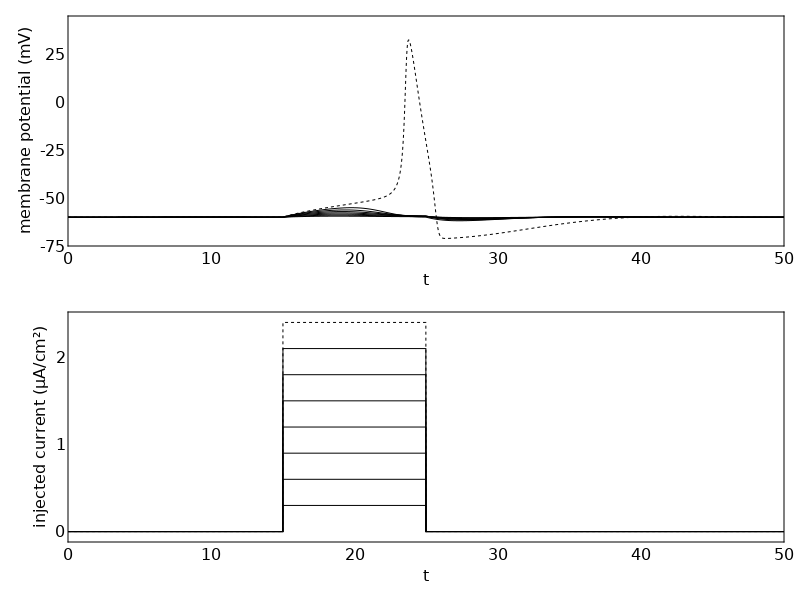

In [5]:
fig = Figure()
ax = Axis(fig[1, 1], xlabel="t", ylabel="membrane potential (mV)")
ax2 = Axis(fig[2, 1], xlabel="t", ylabel="injected current (μA/cm²)")

for i in 1:8
    ls = i == 8 ? :dash : :solid
    lines!(ax, t, hcat(Vs...)[i,:],linestyle=ls, color=:black, linewidth=1)
end
ylims!(ax, -75, 45)
xlims!.([ax,ax2], 0, T)
hidedecorations!.([ax,ax2], ticklabels=false, label=false)
for i in 1:8
    ls = i == 8 ? :dash : :solid
    lines!(ax2, t, hcat(Iapps...)[i,:],linestyle=ls, linewidth=1, color=:black)
end
fig

In [6]:
!isdir("figs") && mkdir("figs")

false

In [7]:
# save("./figs/01.svg",fig)

## 不应期

In [8]:
HH1 = HH{Float64}(N=1, p=0.1)
dt = 0.01; T = 100;
t = collect(0:dt:T)

Vs = Vector{Vector{Float64}}(undef, length(t))
Iapps = Vector{Vector{Float64}}(undef, length(t))

for (i,t) in enumerate(0:dt:T)
    ie = 25<t<25.1 || 27.3 < t < 27.4 || 35 < t < 35.1 || 40 < t < 40.1 || 50 < t < 50.1 ? [80] : [0]
    update!(HH1, HH1.param, ie, dt)
    Vs[i] = HH1.v[:]
    Iapps[i] = ie
end

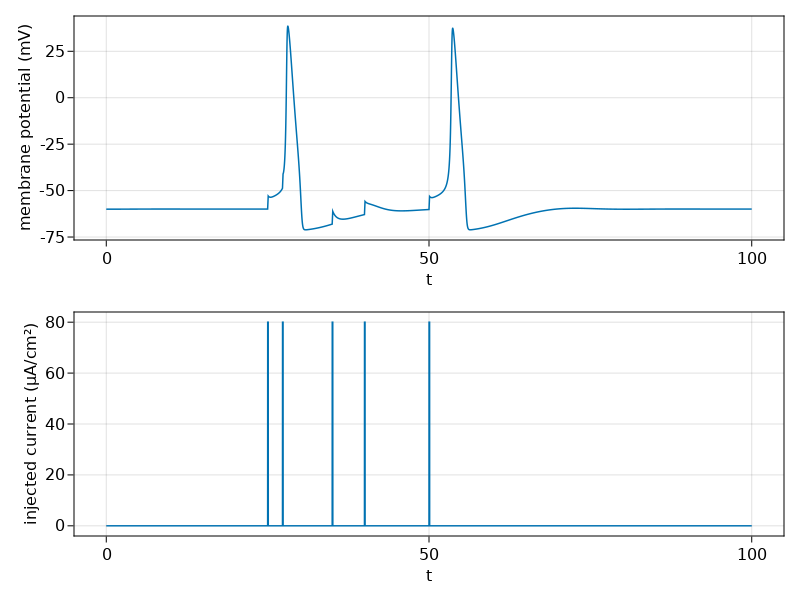

In [9]:
fig2 = Figure()
ax21 = Axis(fig2[1, 1], xlabel="t", ylabel="membrane potential (mV)")
ax22 = Axis(fig2[2, 1], xlabel="t", ylabel="injected current (μA/cm²)")

lines!(ax21, t, vcat(Vs...))
lines!(ax22, t, vcat(Iapps...))

fig2

In [10]:
HH1 = HH{Float64}(N=1, p=0.01)

Vs2 = Vector{Vector{Float64}}(undef, length(t))
Iapps2 = Vector{Vector{Float64}}(undef, length(t))
spikenum = 1
for (i,t) in enumerate(0:dt:T)
    ie = 25<t<25.1  || 50 < t < 50.1 ? [80] : 27.3 < t < 27.4 ? [320] : 35 < t < 35.1 ? [320] : 40 < t < 40.1 ? [320] : [0]
    update!(HH1, HH1.param, ie, dt)
    Vs2[i] = HH1.v[:]
    Iapps2[i] = ie
end

In [11]:
function genfig2()
    fig2 = Figure()
    ax21 = Axis(fig2[1, 1], xlabel="t", ylabel="membrane potential (mV)")
    ax22 = Axis(fig2[2, 1], xlabel="t", ylabel="injected current (μA/cm²)")

    lines!(ax21, t, vcat(Vs...))
    lines!(ax22, t, vcat(Iapps...))

    fig2
    ax23 = Axis(fig2[1, 2], xlabel="t", ylabel="membrane potential (mV)")
    ax24 = Axis(fig2[2, 2], xlabel="t", ylabel="injected current (μA/cm²)")

    lines!(ax23, t, vcat(Vs2...))
    lines!(ax24, t, vcat(Iapps2...))

    hidedecorations!.([ax21,ax22,ax23,ax24], ticklabels=false, label=false)
    xlims!.([ax21,ax22,ax23,ax24], 0, T)
    ylims!.([ax21,ax23], -75, 45)
    ylims!.([ax22,ax24], 0,350)
    return fig2
end

genfig2 (generic function with 1 method)

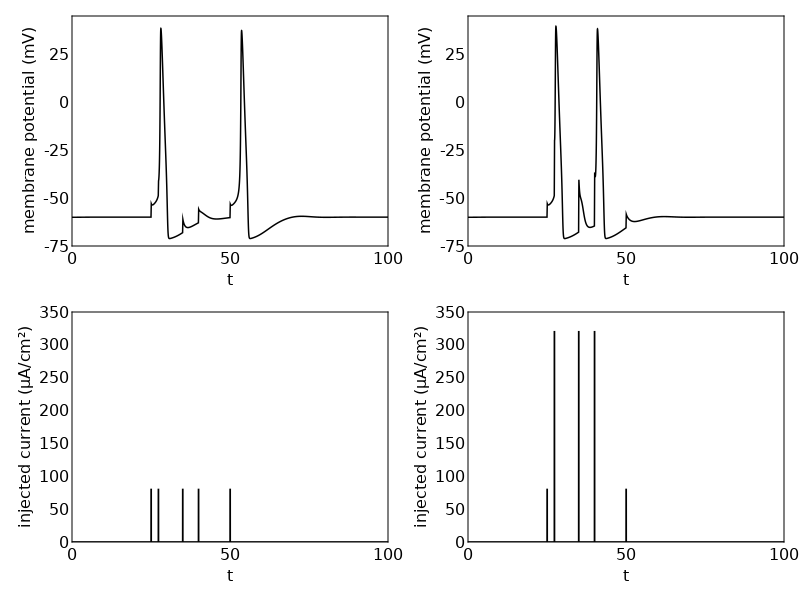

In [12]:
bcolor = Theme( 
    palette = (color = [:black, ], linestyle = [:solid, :dot]),
    Lines = (
        linewidth = 1.5,
    ),
)

# fig2
fig2 = with_theme(genfig2,bcolor)

In [13]:
# save("./figs/02.svg",fig2)

## 阈限与刺激作用时间

In [14]:
HH1 = HH{Float64}(N=1, p=0.01)
durations = collect(0.1:0.1:10)
threshold = Vector{Float64}(undef, length([0.1:0.1:10...]));
for (j,k) in enumerate(durations)
    for i in t
        update!(HH1, HH1.param, [0], dt);
    end

    Iapp = 1;
    Vs = zeros(length(t)) .- 80;

    while !(maximum(Vs) > 0)
        for (i,tt) in enumerate(t)
            Ie = 0 < tt <= k ? Iapp : 0;
            update!(HH1, HH1.param, [Ie], dt);
            Vs[i] = HH1.v[1]
        end
        Iapp += 1
    end
    threshold[j] = Iapp
end

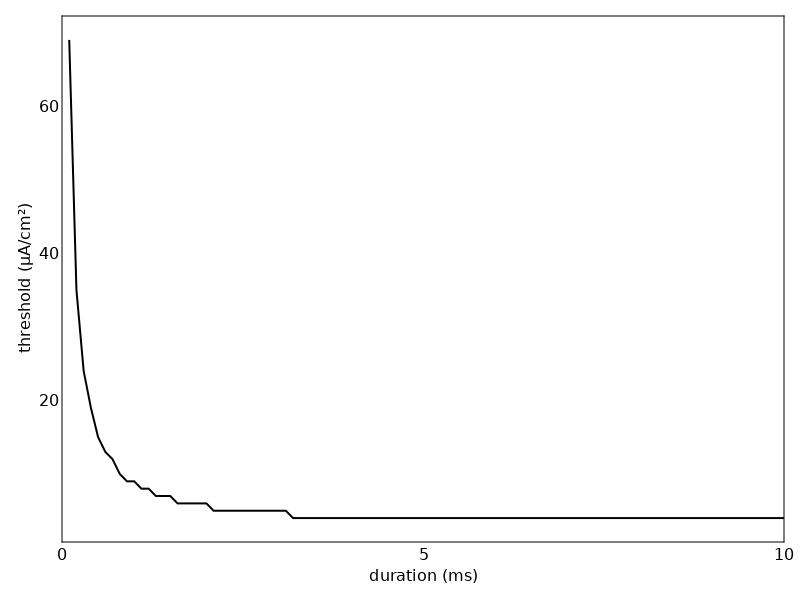

In [15]:
function genfig3()
    fig = Figure()    
    ax = Axis(
        fig[1,1],
        xlabel="duration (ms)",
        ylabel="threshold (μA/cm²)",
        )
    lines!(ax,durations, threshold, color=:black, linewidth=2.)
    hidedecorations!(ax, ticklabels=false, label=false)
    xlims!(ax, 0, 10)
    return fig
end

fig3 = genfig3()

In [16]:
# save("./figs/03.svg",fig3)

## 激发率与持续作用的刺激强度

In [17]:
dt=0.05
T = 1000
ies = range(0,30,100)
spikeNum = Vector{Int}(undef, length(ies));
for (j,k) in enumerate(ies)
    for i in t
        update!(HH1, HH1.param, [0], dt);
    end

    Vs = Vector{Float64}(undef, length(t));
    for (i,_) in enumerate(t)
        Vs[i] = HH1.v[1]
        update!(HH1, HH1.param, [k], dt);
    end
    spikeNum[j] = (Vs[1:end-1] .< -20) .& (Vs[2:end] .> -20) |> sum;
end

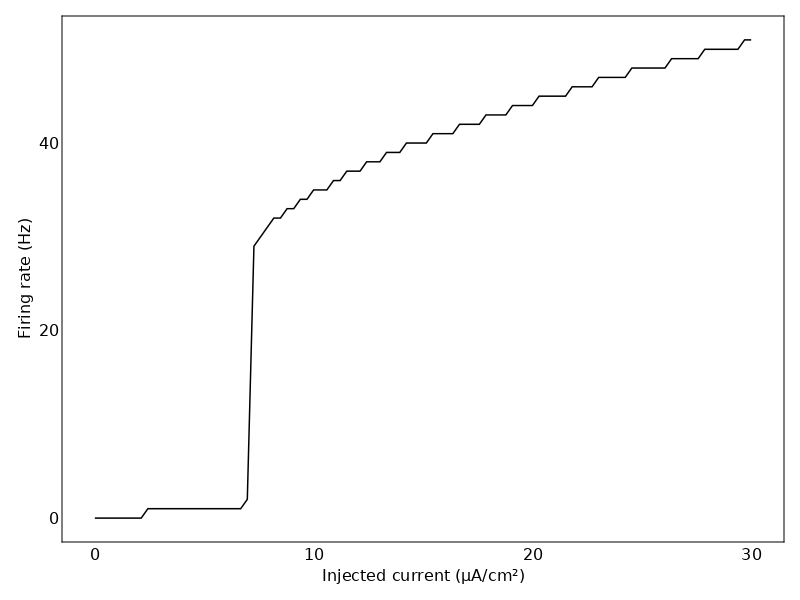

In [18]:
function genfig4()
    fig = Figure()
    ax = Axis(
        fig[1,1],
        xlabel="Injected current (μA/cm²)",
        ylabel="Firing rate (Hz)",
        )
    lines!(ax,ies , spikeNum ./T * 1000)
    hidedecorations!(ax, ticklabels = false, label = false)
    return fig
end

fig4 = with_theme(genfig4, bcolor)

In [19]:
# save("./figs/04.svg",fig4)

## 抑制后反弹

In [20]:
dt = 0.01; T = 200
HH1 = HH{Float64}(N=1, p=0.01)

t = collect(0:dt:T)
Vs = Vector{Vector{Float64}}(undef, length(t))
Ies = Vector{Vector{Float64}}(undef, length(t))
for (i, t) in enumerate(t)
    ie = 75 < t < 100 ? -5 : 0
    update!(HH1, HH1.param, [ie], dt)
    Vs[i] = HH1.v[:]
    Ies[i] = [ie]
end

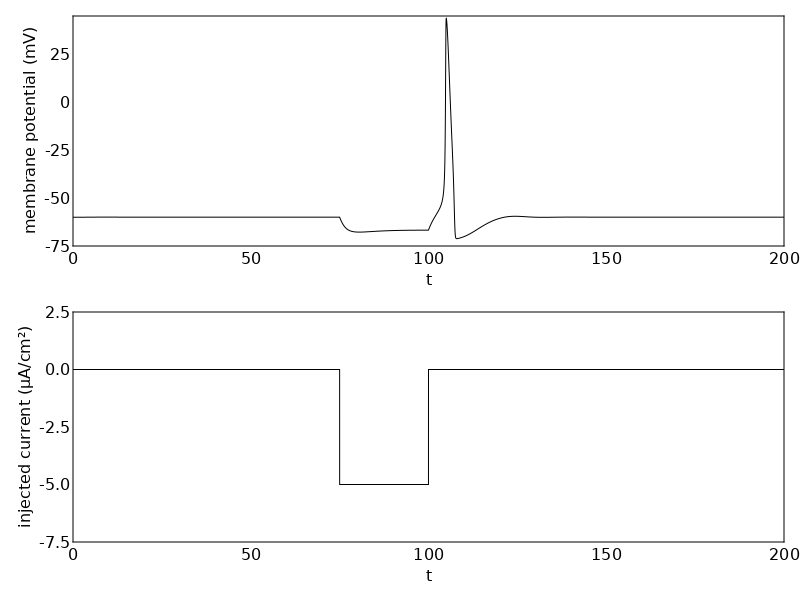

In [21]:
function genfig5()
    fig = Figure()
    ax = Axis(fig[1,1], xlabel="t", ylabel="membrane potential (mV)")
    ax2 = Axis(fig[2,1], xlabel="t", ylabel="injected current (μA/cm²)")
    for i in 1:1
        lines!(ax, t, hcat(Vs...)[i,:], color=:black, linewidth=1)
    end
    for i in 1:1
        lines!(ax2, t, hcat(Ies...)[i,:], color=:black, linewidth=1)
    end
    hidedecorations!(ax, ticklabels=false, label=false)
    hidedecorations!(ax2, ticklabels=false, label=false)
    xlims!(ax, 0, T)
    xlims!(ax2, 0, T)
    ylims!(ax, -75, 45)
    ylims!(ax2, -7.5, 2.5)
    return fig
end
fig5 = genfig5()

In [22]:
# save("./figs/05.svg",fig5)